In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp

# get data

In [2]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/stage=8+what=elaborated/',
)

In [3]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

'581a93929506b064'

In [4]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# how do fitness complexity and robustness relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Fitness Complexity', ylabel='Fraction Mutations that are Deleterious'>

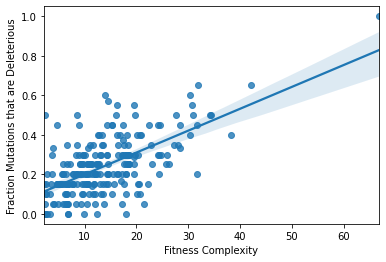

In [5]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


(0.48957745216533727, 0.0015603663186773446)

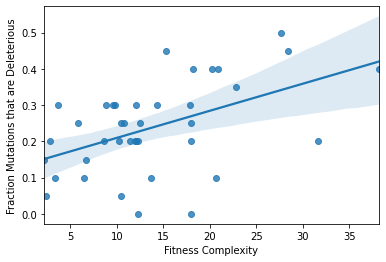

In [6]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Fitness Complexity'],
    df40['Fraction Mutations that are Deleterious'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


(0.5849110576959062, 7.378539088314307e-05)

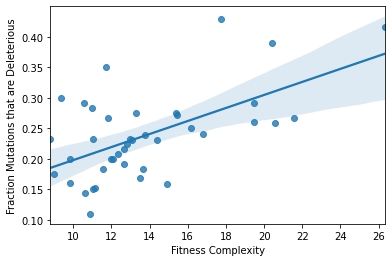

In [7]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
)

# how do phenotype complexity and robustness relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Phenotype Complexity', ylabel='Fraction Mutations that are Deleterious'>

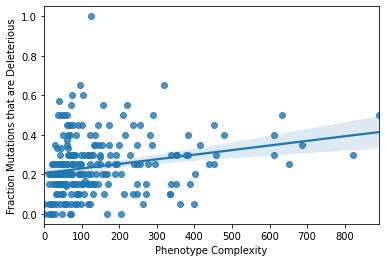

In [8]:
tp.tee(
    sns.regplot,
    data=df,
    x='Phenotype Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


(0.43373970790520944, 0.005805588760153485)

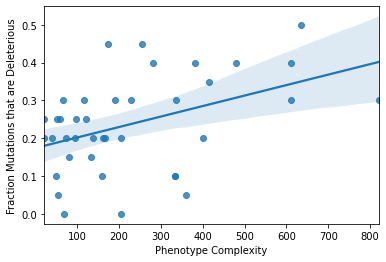

In [9]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Phenotype Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Phenotype Complexity'],
    df40['Fraction Mutations that are Deleterious'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


(0.4209590851927236, 0.006832009771417999)

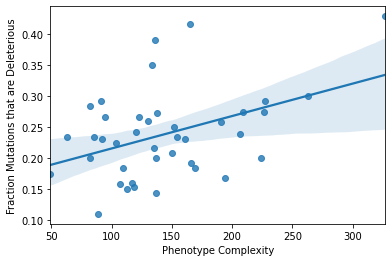

In [10]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Phenotype Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Phenotype Complexity'].mean(),
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
)

# how do cardinal interface complexity and robustness relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Cardinal Interface Complexity', ylabel='Fraction Mutations that are Deleterious'>

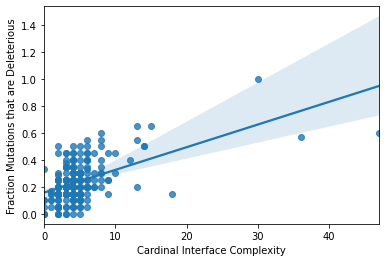

In [11]:
tp.tee(
    sns.regplot,
    data=df,
    x='Cardinal Interface Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


(0.13449599750574123, 0.4143179811876519)

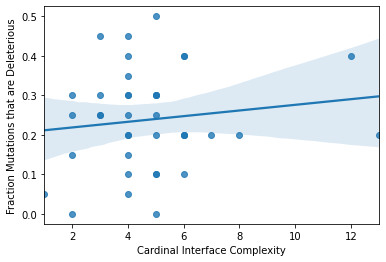

In [12]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Cardinal Interface Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Cardinal Interface Complexity'],
    df40['Fraction Mutations that are Deleterious'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


(0.6607531830616875, 3.4807692149004584e-06)

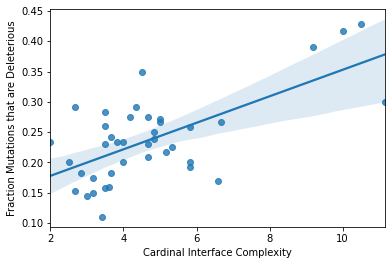

In [13]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Cardinal Interface Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Cardinal Interface Complexity'].mean(),
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
)

# how do fitness complexity and mutating mutant fitness relate?

## mean

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Fitness Complexity', ylabel='Mean Mutating Mutant Fitness Differential'>

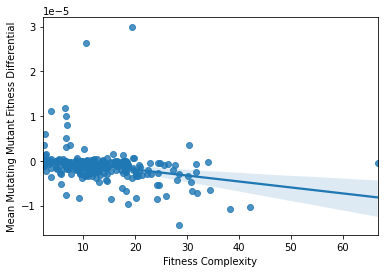

In [14]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Mean Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.png


(-0.5831490494991879, 9.781644619122749e-05)

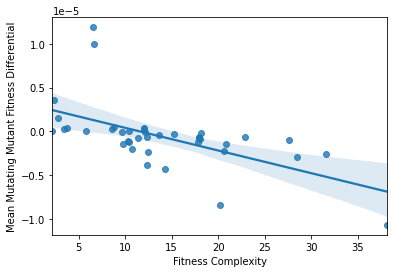

In [15]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Mean Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Fitness Complexity'],
    df40['Mean Mutating Mutant Fitness Differential'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.png


(-0.24545374975701492, 0.12685523969938614)

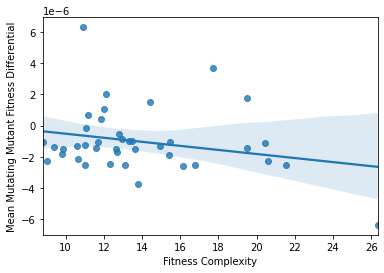

In [16]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Mean Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Mean Mutating Mutant Fitness Differential'].mean(),
)

## median

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Fitness Complexity', ylabel='Median Mutating Mutant Fitness Differential'>

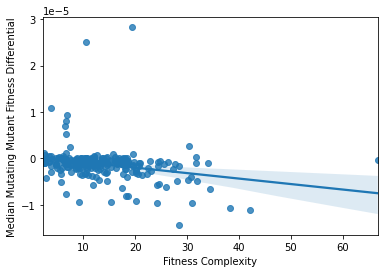

In [17]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Median Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.png


(-0.5295683636222862, 0.0005267571710210367)

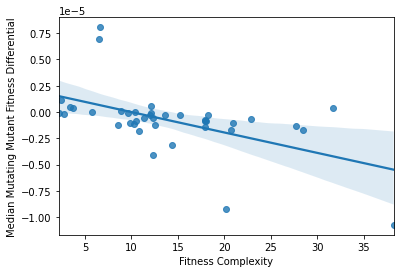

In [18]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Median Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Fitness Complexity'],
    df40['Median Mutating Mutant Fitness Differential'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.png


(-0.2027672398015248, 0.20954014537666749)

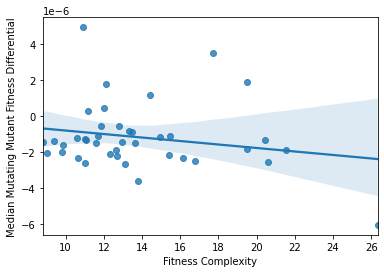

In [19]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Median Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Median Mutating Mutant Fitness Differential'].mean(),
)

## fraction deleterious

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Fitness Complexity', ylabel='Fraction Mutating Mutations that are Deleterious'>

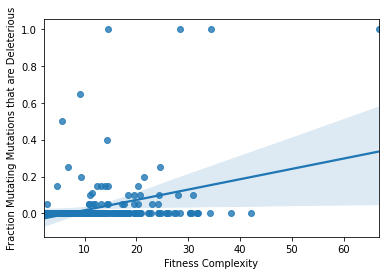

In [20]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Fraction Mutating Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


(-0.002178911639238985, 0.9894964900896778)

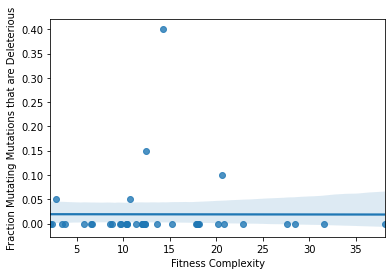

In [21]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Fraction Mutating Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Fitness Complexity'],
    df40['Fraction Mutating Mutations that are Deleterious'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


(0.21446248038486848, 0.18388350085751132)

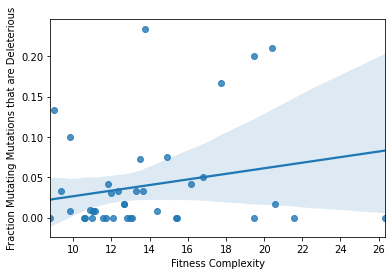

In [22]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Fraction Mutating Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Fraction Mutating Mutations that are Deleterious'].mean(),
)